In [45]:
pip install eli5

In [46]:
# Import dependencies
import warnings
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

import statsmodels.api as sm
from matplotlib import pyplot
import matplotlib.pylab as plt
from collections import Counter
from statsmodels.graphics.gofplots import qqplot

from imblearn import under_sampling
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE


from sklearn.svm import SVC
from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


from yellowbrick.style import set_palette
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError

import eli5
from eli5.sklearn import PermutationImportance

from mlxtend.evaluate import bias_variance_decomp

In [47]:
import pandas as pd

# URL of the raw content of the dataset
file_url = "https://raw.githubusercontent.com/jithendhar1435/employee-satisfaction-dataset/main/data.csv"

# Read the dataset into a DataFrame
employee_data = pd.read_csv(file_url)

# Now you can use 'employee_data' DataFrame in your task
employee_data.head()


,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


In [48]:
# Check for missing values
missing_values = employee_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Unnamed: 0          0
emp_id              0
age                 0
Dept                0
location            0
education           0
recruitment_type    0
job_level           0
rating              0
onsite              0
awards              0
certifications      0
salary              0
satisfied           0
dtype: int64


Text(0.5, 1.0, 'Job Satisfaction Correlation')

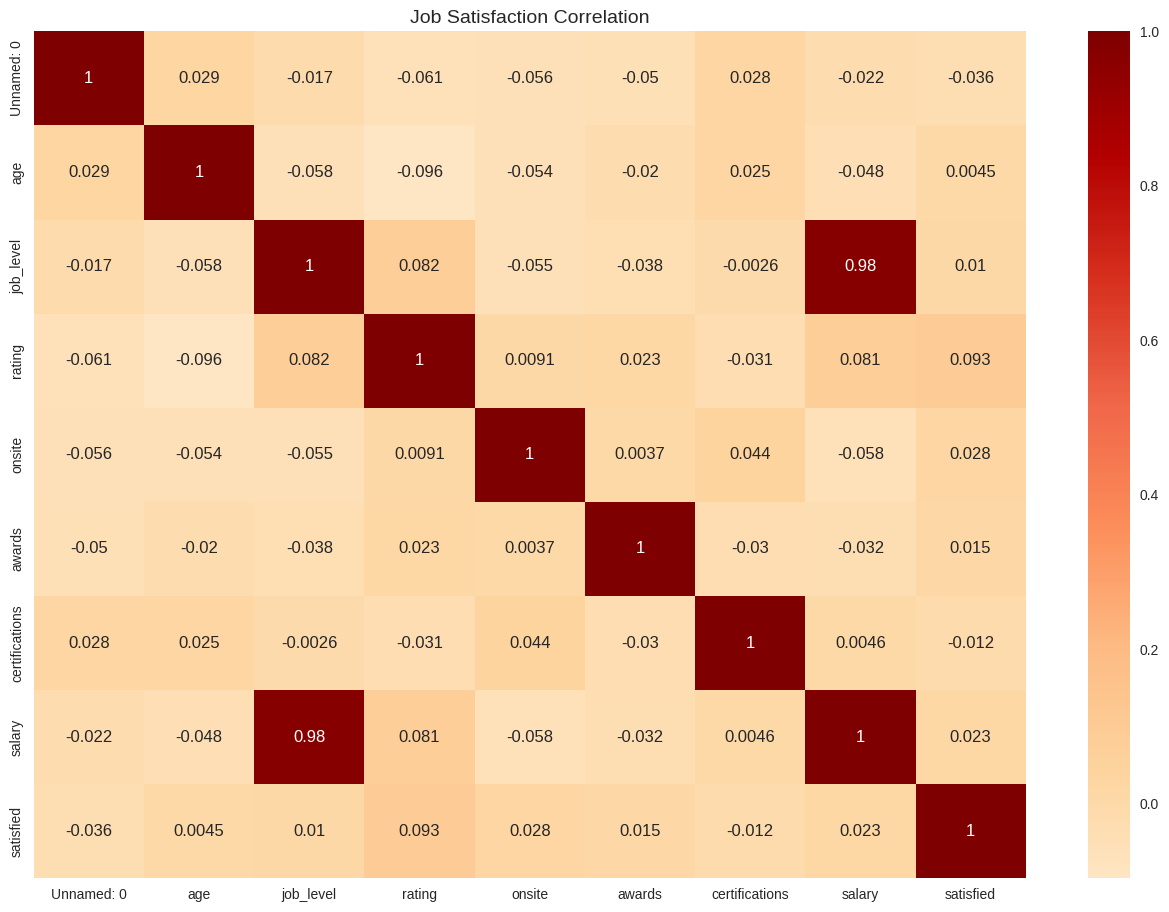

In [49]:
#Updated Heatmap with all fields included
plt.figure(figsize=(16,11))
sns.heatmap(employee_data.corr(), annot=True, cmap='OrRd', center = .36)
plt.title('Job Satisfaction Correlation', fontsize=14)

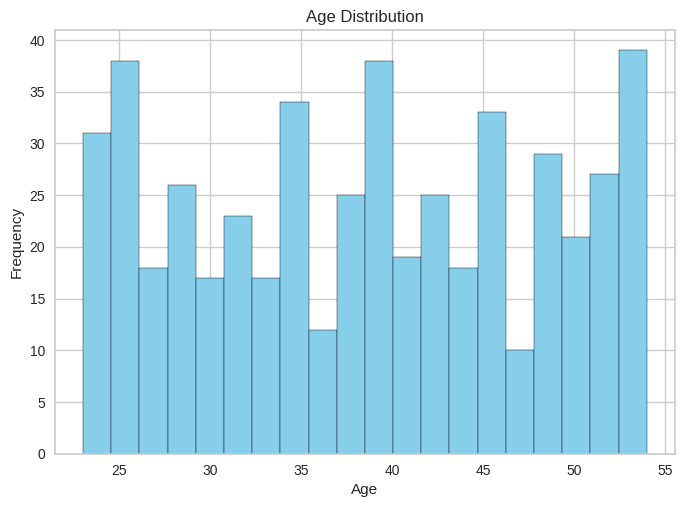

In [59]:
import matplotlib.pyplot as plt

plt.hist(employee_data['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


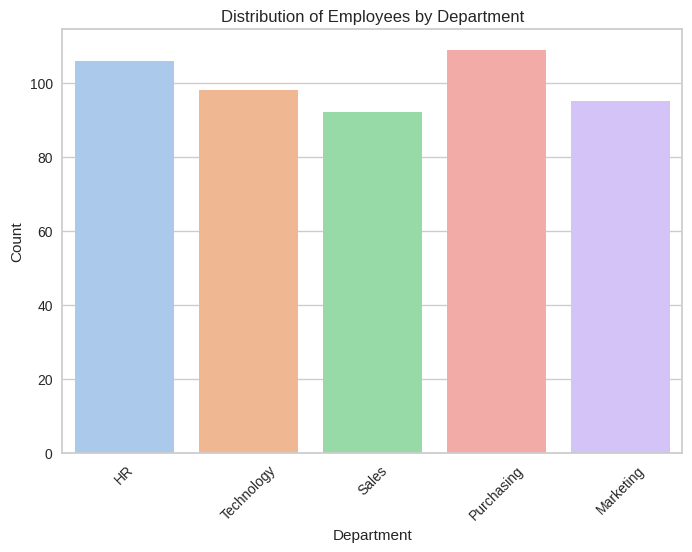

In [60]:
import seaborn as sns

sns.countplot(x='Dept', data=employee_data, palette='pastel')
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Distribution of Employees by Department')
plt.xticks(rotation=45)
plt.show()


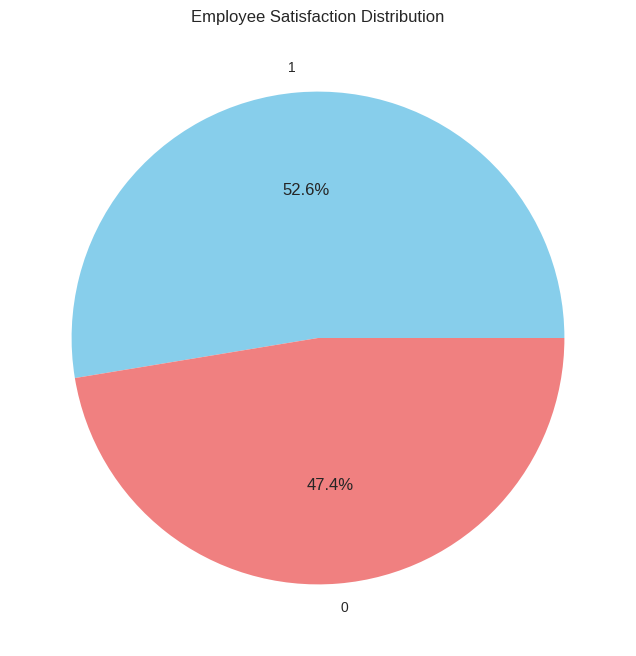

In [61]:
plt.figure(figsize=(8, 8))
employee_data['satisfied'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Employee Satisfaction Distribution')
plt.ylabel('')
plt.show()


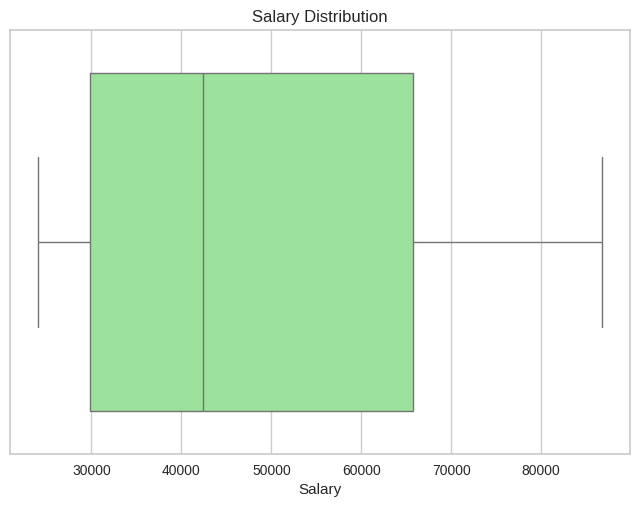

In [62]:
sns.boxplot(x='salary', data=employee_data, color='lightgreen')
plt.xlabel('Salary')
plt.title('Salary Distribution')
plt.show()


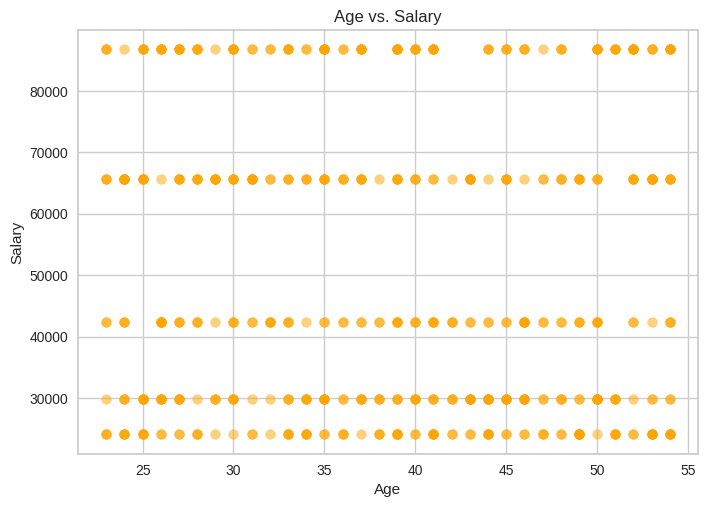

In [63]:
plt.scatter(employee_data['age'], employee_data['salary'], color='orange', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs. Salary')
plt.show()


In [50]:
#Using OLS for finding the p value to check the significant features
numericalData = employee_data.select_dtypes(["float64","int64"]).columns.tolist()

model = sm.OLS(employee_data['satisfied'], employee_data[numericalData]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              satisfied   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.907e+28
Date:                Wed, 28 Feb 2024   Prob (F-statistic):                        0.00
Time:                        04:05:30   Log-Likelihood:                          15143.
No. Observations:                 500   AIC:                                 -3.027e+04
Df Residuals:                     491   BIC:                                 -3.023e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Unnamed: 0      3.835e-18   5.09e-18      0.754      0.451   -6.16e-18    1.38e-17
age             6.912e-17   5.76e-17      1.200      0.231   -4.41e-17    1.82e-16
job_level       1.943e-16   2.57e-15      0.076      0.940   -4.85e-15    5.24e-15
rating         -2.288e-15   5.06e-16     -4.525      0.000   -3.28e-15   -1.29e-15
onsite          2.567e-16   1.51e-15      0.169      0.865   -2.72e-15    3.23e-15
awards          3.075e-16   2.59e-16      1.189      0.235   -2.01e-16    8.16e-16
certifications  -1.11e-16   1.52e-15     -0.073      0.942   -3.11e-15    2.88e-15
salary           3.27e-19   1.55e-19      2.113      0.035    2.29e-20    6.31e-19
satisfied          1.0000   1.54e-15   6.51e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                       62.596   Durbin-Watson:                   0.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.384
Skew:                          -0.320   Prob(JB):                     5.07e-06
Kurtosis:                       2.128   Cond. No.                     1.86e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Define features (x) and target variable (y)
x = employee_data.drop('satisfied', axis=1)  # Features excluding the target variable
y = employee_data['satisfied']  # Target variable

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=10)

# Combine the training and test sets for encoding
combined_data = pd.concat([x_train, x_test])

# Encode categorical variables using one-hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)
combined_encoded = encoder.fit_transform(combined_data)

# Split the combined encoded data back into training and test sets
x_train_encoded = combined_encoded[:len(x_train)]
x_test_encoded = combined_encoded[len(x_train):]

# Convert encoded arrays back to DataFrames
x_train_encoded = pd.DataFrame(x_train_encoded, columns=encoder.get_feature_names_out(input_features=x_train.columns))
x_test_encoded = pd.DataFrame(x_test_encoded, columns=encoder.get_feature_names_out(input_features=x_test.columns))

# Align features in training and test sets
x_train_aligned, x_test_aligned = x_train_encoded.align(x_test_encoded, join='left', axis=1, fill_value=0)


In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define features (x) and target variable (y)
x = employee_data.drop('satisfied', axis=1)  # Features excluding the target variable
y = employee_data['satisfied']  # Target variable

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=10)

# Apply one-hot encoding to categorical features
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train)
x_test_encoded = encoder.transform(x_test)

# Align columns between training and test sets
x_train_encoded_df = pd.DataFrame(x_train_encoded, columns=encoder.get_feature_names_out(input_features=x_train.columns))
x_test_encoded_df = pd.DataFrame(x_test_encoded, columns=encoder.get_feature_names_out(input_features=x_test.columns))
x_train_aligned, x_test_aligned = x_train_encoded_df.align(x_test_encoded_df, join='left', axis=1, fill_value=0)

# Initialize and train the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(x_train_aligned, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(x_test_aligned)

# Calculate accuracy score
score_lr = round(accuracy_score(y_pred_lr, y_test) * 100, 2)
print("The accuracy score achieved using Logistic Regression is: " + str(score_lr) + " %")


The accuracy score achieved using Logistic Regression is: 49.71 %


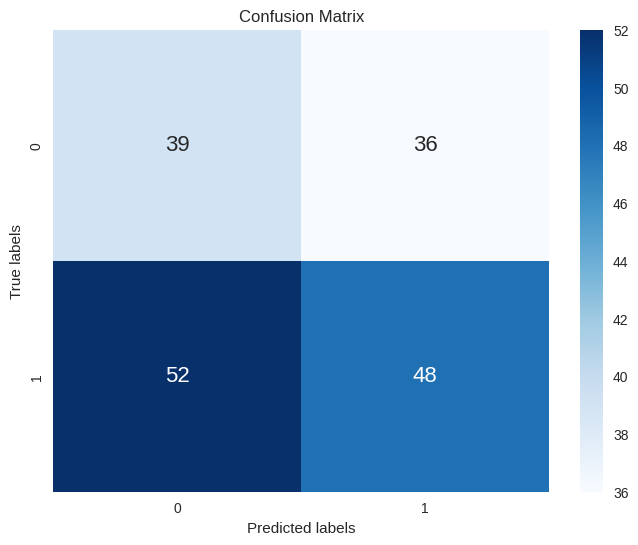

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


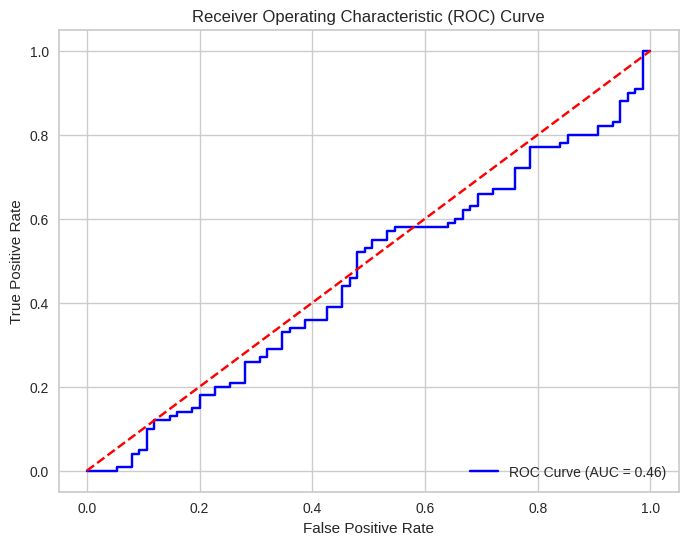

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
y_probs_lr = lr_model.predict_proba(x_test_aligned)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_lr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_probs_lr)))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


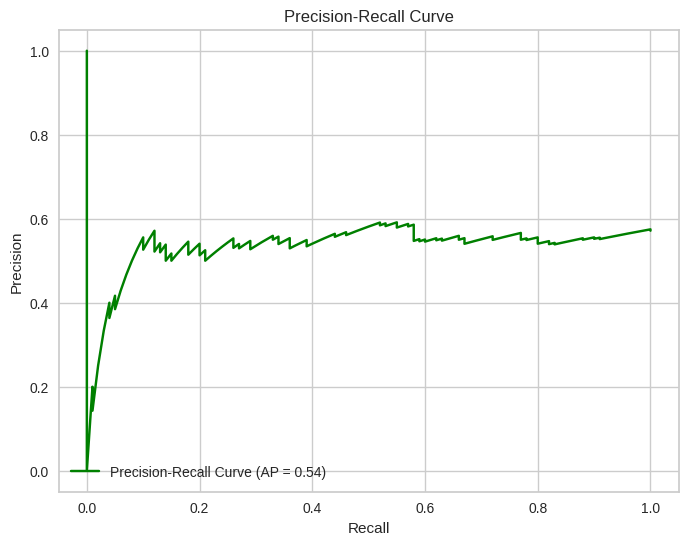

In [72]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs_lr)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve (AP = {:.2f})'.format(average_precision_score(y_test, y_probs_lr)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


In [53]:
from sklearn.preprocessing import OneHotEncoder

# Concatenate the training and test sets to ensure all categories are present
concatenated_data = pd.concat([x_train, x_test])

# Initialize the OneHotEncoder with all categories
encoder = OneHotEncoder(drop='first', sparse=False)
x_encoded = encoder.fit_transform(concatenated_data)

# Split the encoded data back into training and test sets
x_train_encoded = x_encoded[:len(x_train)]
x_test_encoded = x_encoded[len(x_train):]

# Initialize and fit the SVM model
svm_model = SVC()
svm_model.fit(x_train_encoded, y_train)

# Make predictions
y_pred_svm = svm_model.predict(x_test_encoded)

# Calculate accuracy score
score_svm = round(accuracy_score(y_pred_svm, y_test) * 100, 2)
print("The accuracy score achieved using SVM is: " + str(score_svm) + " %")


The accuracy score achieved using SVM is: 50.86 %


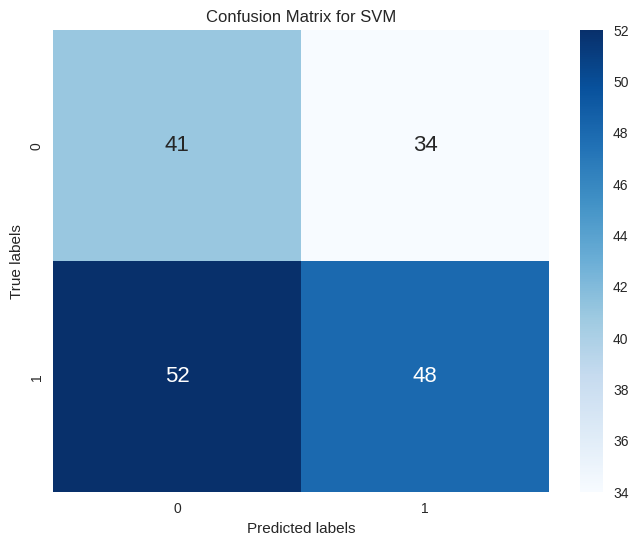

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for SVM')
plt.show()


In [54]:
from sklearn.preprocessing import OneHotEncoder

# Define features (x) and target variable (y)
x = employee_data.drop('satisfied', axis=1)  # Features excluding the target variable
y = employee_data['satisfied']  # Target variable

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=10)

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False,handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train)
x_test_encoded = encoder.transform(x_test)

# Initialize and fit the KNN model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train_encoded, y_train)

# Make predictions
y_pred_knn = knn.predict(x_test_encoded)

# Calculate accuracy score
score_knn = round(accuracy_score(y_pred_knn, y_test) * 100, 2)
print("The accuracy score achieved using K Nearest Neighbors is: " + str(score_knn) + " %")


The accuracy score achieved using K Nearest Neighbors is: 48.57 %


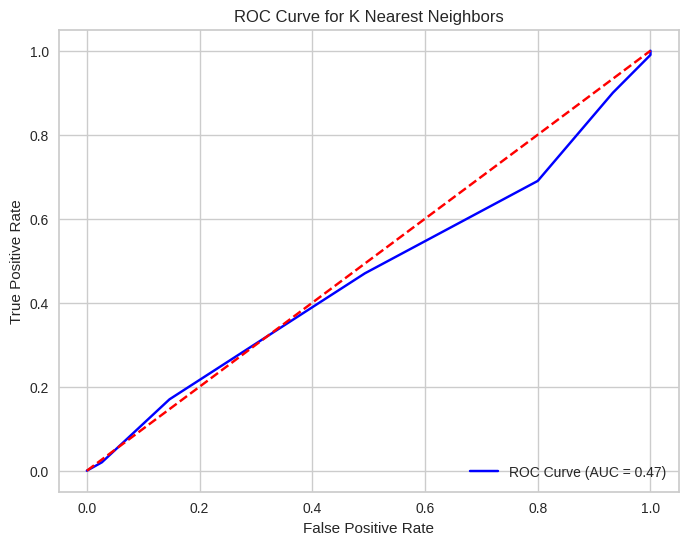

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
y_probs_knn = knn.predict_proba(x_test_encoded)[:, 1]

# Compute ROC curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_probs_knn)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_probs_knn)))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K Nearest Neighbors')
plt.legend(loc='lower right')
plt.show()


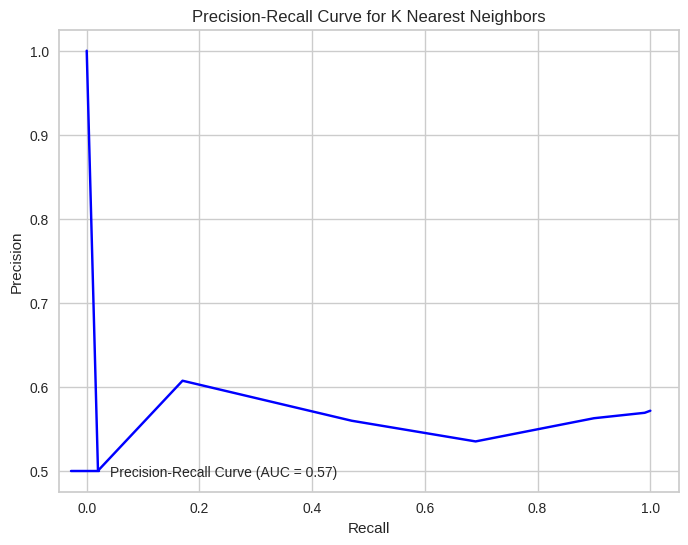

In [77]:
from sklearn.metrics import precision_recall_curve, auc

# Compute precision and recall
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_probs_knn)

# Compute area under the curve (AUC) for precision-recall curve
auc_score_knn = auc(recall_knn, precision_knn)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_knn, precision_knn, color='blue', label='Precision-Recall Curve (AUC = {:.2f})'.format(auc_score_knn))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for K Nearest Neighbors')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


In [55]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the decision tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_aligned, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(x_test_aligned)

# Calculate accuracy score
score_dt = round(accuracy_score(y_pred_dt, y_test) * 100, 2)
print("The accuracy score achieved using Decision Tree is: " + str(score_dt) + " %")


The accuracy score achieved using Decision Tree is: 53.14 %


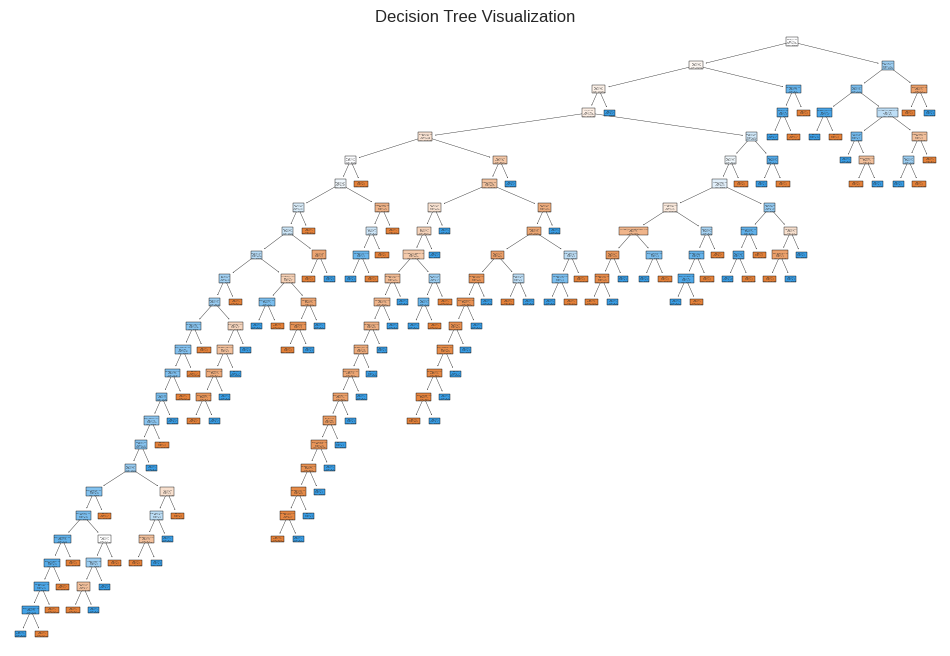

In [78]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=x_train_aligned.columns, class_names=['Not Satisfied', 'Satisfied'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()


In [56]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the random forest model
rf_model = RandomForestClassifier()
rf_model.fit(x_train_aligned, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(x_test_aligned)

# Calculate accuracy score
score_rf = round(accuracy_score(y_pred_rf, y_test) * 100, 2)
print("The accuracy score achieved using Random Forest is: " + str(score_rf) + " %")


The accuracy score achieved using Random Forest is: 46.86 %


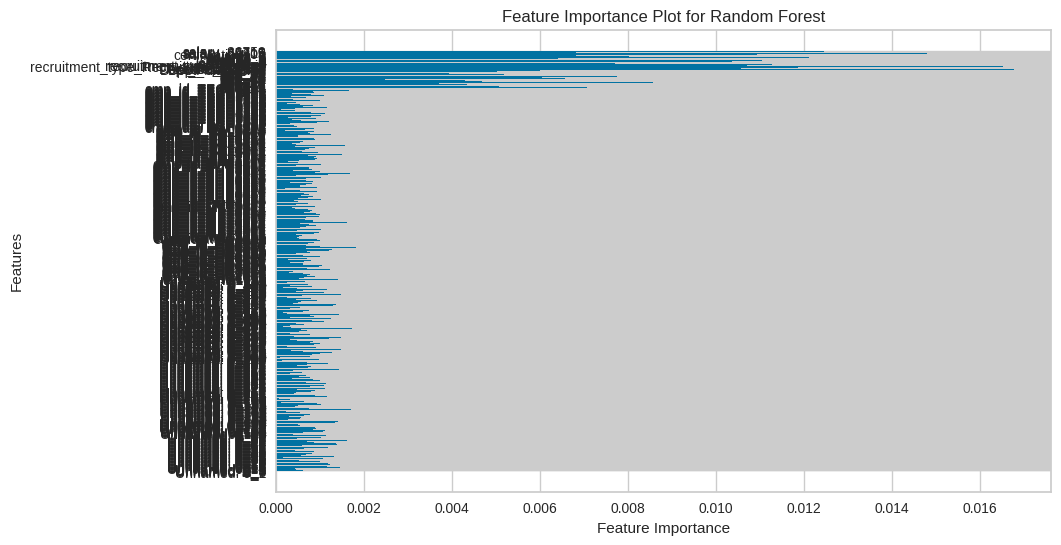

In [79]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(x_train_aligned.columns, rf_model.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot for Random Forest')
plt.show()


In [57]:
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train_aligned, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(x_test_aligned)

# Calculate accuracy score
score_xgb = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)
print("The accuracy score achieved using XGBoost is: " + str(score_xgb) + " %")


The accuracy score achieved using XGBoost is: 46.86 %


<Figure size 1000x600 with 0 Axes>

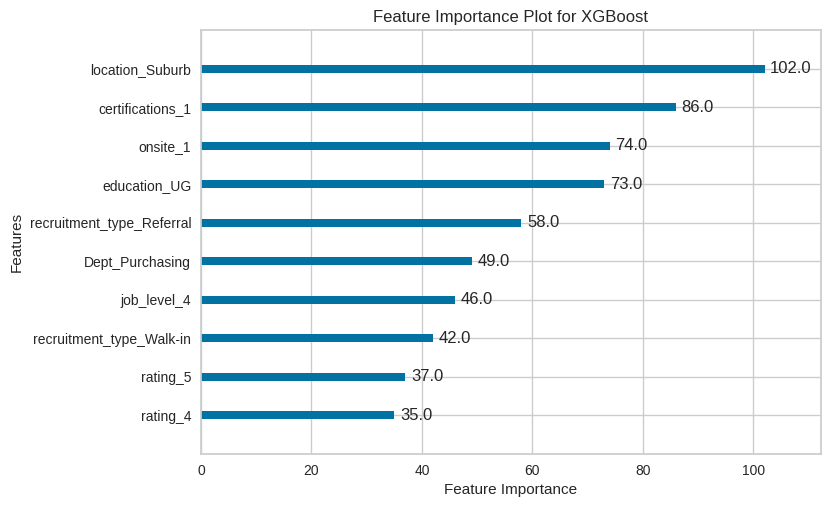

In [81]:
# Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot for XGBoost')
plt.show()


In [58]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(x_train_aligned, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(x_test_aligned)

# Calculate accuracy score
score_nb = round(accuracy_score(y_pred_nb, y_test) * 100, 2)
print("The accuracy score achieved using Naive Bayes is: " + str(score_nb) + " %")


The accuracy score achieved using Naive Bayes is: 44.0 %


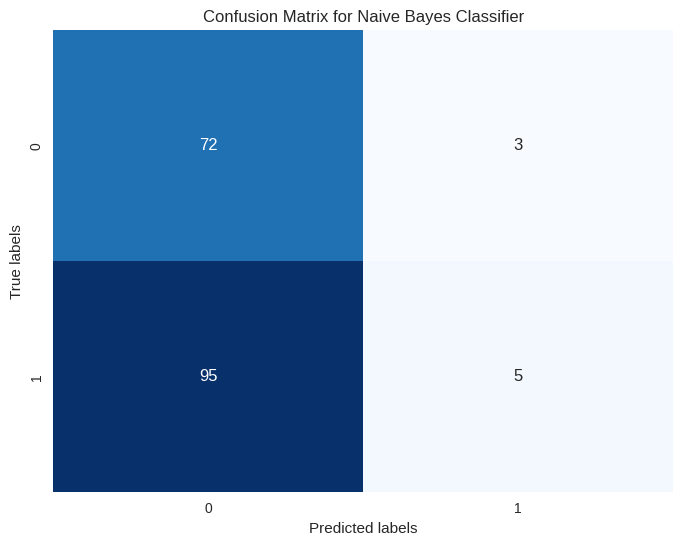

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()
